In [22]:
import pandas as pd

#In CSV rename system:index to system_index and .geo to geo

pd.set_option('display.max_rows', 50)


df = pd.read_csv('../AlanahalliKere_2016.csv')

# dfaa = pd.read_csv('./perennial_2_tile.csv')
# dfab = pd.read_csv('./seasonal_6_tile.csv')
# df = pd.concat([dfaa,dfab]).reset_index()


In [23]:
df['Name'] = 'seasonal'
df.head()


,system_index,Name,altitudeMo,classification,descriptio,extrude,icon,tessellate,visibility,geo
0,20160103T053442_20160103T053442_T43PFP_0000000...,seasonal,NaN,1,NaN,0,NaN,1,-1,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
1,20160103T053442_20160103T053442_T43PFP_0000000...,seasonal,NaN,1,NaN,0,NaN,1,-1,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
2,20160103T053442_20160103T053442_T43PFP_0000000...,seasonal,NaN,1,NaN,0,NaN,1,-1,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
3,20160103T053442_20160103T053442_T43PFP_0000000...,seasonal,NaN,1,NaN,0,NaN,1,-1,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
4,20160103T053442_20160103T053442_T43PFP_0000000...,seasonal,NaN,1,NaN,0,NaN,1,-1,"{""geodesic"":false,""type"":""Point"",""coordinates""..."


In [24]:
dfn = df
dfn["system_index"] = df["system_index"].str[:6]

dfn.fillna(0)

,system_index,Name,altitudeMo,classification,descriptio,extrude,icon,tessellate,visibility,geo
0,201601,seasonal,0.0,1,0.0,0,0.0,1,-1,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
1,201601,seasonal,0.0,1,0.0,0,0.0,1,-1,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
2,201601,seasonal,0.0,1,0.0,0,0.0,1,-1,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
3,201601,seasonal,0.0,1,0.0,0,0.0,1,-1,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
4,201601,seasonal,0.0,1,0.0,0,0.0,1,-1,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
...,...,...,...,...,...,...,...,...,...,...
1309,201612,seasonal,0.0,1,0.0,0,0.0,1,-1,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
1310,201612,seasonal,0.0,1,0.0,0,0.0,1,-1,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
1311,201612,seasonal,0.0,1,0.0,0,0.0,1,-1,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
1312,201612,seasonal,0.0,1,0.0,0,0.0,1,-1,"{""geodesic"":false,""type"":""Point"",""coordinates""..."


In [25]:
# # import statistics
# dfn['tessellate'] = dfpn['tessellate'].astype('int32')
# dfpn['classification'] = dfn['classification'].astype('int32')
# dfn['tessellate' ] = 1

# dfnn = dfn.groupby(['system_index','geo','Name','tessellate'])['classification'].agg(pd.Series.mode).to_frame().reset_index()

# # dfnn['tessellate'] = 1
# df = dfnn
# # df.dtypes
# df = df.astype('str')
# df['tessellate'] = df['tessellate'].astype('int32')
# df['classification'] = df['classification'].astype('int32')
# df['classification']

In [26]:
dfp = df[df.Name.str.startswith('perennial')]
dfs = df[df.Name.str.startswith('seasonal')]

# dfs.head()

In [27]:
p_coors = dfp.geo.unique()
s_coors = dfs.geo.unique()


In [28]:
# occur_p_t = dfp.groupby(['geo']).count()[["geo","classification","Name"]]

occur_p_w = dfp.groupby(['geo', 'classification']).apply(lambda g: g.sum())
occur_p_w.head()
occur_p_w = occur_p_w.drop(['classification'], axis=1)
occur_p_w = occur_p_w.drop(['geo'], axis=1)
occur_p_w = occur_p_w.reset_index()
occur_p_w = occur_p_w[["geo","classification","tessellate"]]

# occur_p_w = occur_p_w.drop(['geo'],axis= 1)
occur_p_w
# o = occur_p_w["Name"]
# occur_p_w = occur_p_w[['geo']]
# occur_p_w[["geo","classification","Name"]]
# o.columns



,geo,classification,tessellate


In [29]:
occur_p_w_pivot = occur_p_w.pivot_table('tessellate', ['geo'], 'classification')
occur_p_w_pivot = occur_p_w_pivot.fillna(0)

for i in range(1,5):
    if i not in occur_p_w_pivot:
        occur_p_w_pivot[i] = 0
    
occur_p_w_pivot["Tot"] = occur_p_w_pivot[1] + occur_p_w_pivot[2] + occur_p_w_pivot[3] + occur_p_w_pivot[4]

In [30]:
occur_p_w_pivot["frac"] = occur_p_w_pivot[2]/occur_p_w_pivot["Tot"]

In [31]:
print(f'Mean frac for perennial {occur_p_w_pivot["frac"].mean()}')

Mean frac for perennial nan


In [32]:
occur_p_w_pivot

classification,1,2,3,4,Tot,frac
geo,,,,,,


In [33]:
occur_s_w = dfs.groupby(['geo', 'classification']).apply(lambda g: g.sum())
occur_s_w = occur_s_w.drop(['classification'], axis=1)
occur_s_w = occur_s_w.drop(['geo'], axis=1)
occur_s_w = occur_s_w.reset_index()
occur_s_w = occur_s_w[["geo","classification","tessellate"]]

occur_s_w

,geo,classification,tessellate
0,"{""geodesic"":false,""type"":""Point"",""coordinates""...",1,13
1,"{""geodesic"":false,""type"":""Point"",""coordinates""...",4,5
2,"{""geodesic"":false,""type"":""Point"",""coordinates""...",1,9
3,"{""geodesic"":false,""type"":""Point"",""coordinates""...",2,1
4,"{""geodesic"":false,""type"":""Point"",""coordinates""...",4,8
...,...,...,...
141,"{""geodesic"":false,""type"":""Point"",""coordinates""...",4,8
142,"{""geodesic"":false,""type"":""Point"",""coordinates""...",1,11
143,"{""geodesic"":false,""type"":""Point"",""coordinates""...",4,7
144,"{""geodesic"":false,""type"":""Point"",""coordinates""...",1,10


In [34]:
occur_s_w_pivot = occur_s_w.pivot_table('tessellate', ['geo'], 'classification')
occur_s_w_pivot = occur_s_w_pivot.fillna(0)

for i in range(1,5):
    if i not in occur_s_w_pivot:
        occur_s_w_pivot[i] = 0
    
occur_s_w_pivot["Tot"] = occur_s_w_pivot[1] + occur_s_w_pivot[2] + occur_s_w_pivot[3] + occur_s_w_pivot[4]

In [35]:
occur_s_w_pivot["frac"] = occur_s_w_pivot[2]/occur_s_w_pivot["Tot"]

In [36]:
print(f'Mean frac for seasonal {occur_s_w_pivot["frac"].mean()}')


Mean frac for seasonal 0.10045662100456622


In [37]:
occur_s_w_pivot

classification,1,2,3,4,Tot,frac
geo,,,,,,
"{""geodesic"":false,""type"":""Point"",""coordinates"":[76.70629366517718,12.282543299548248]}",13.0,0.0,0.0,5.0,18.0,0.000000
"{""geodesic"":false,""type"":""Point"",""coordinates"":[76.70629541269615,12.282814474590596]}",9.0,1.0,0.0,8.0,18.0,0.055556
"{""geodesic"":false,""type"":""Point"",""coordinates"":[76.70629716025667,12.283085649627337]}",10.0,0.0,0.0,8.0,18.0,0.000000
"{""geodesic"":false,""type"":""Point"",""coordinates"":[76.70629890785877,12.283356824658476]}",6.0,0.0,0.0,12.0,18.0,0.000000
"{""geodesic"":false,""type"":""Point"",""coordinates"":[76.70630065550242,12.283627999684011]}",3.0,0.0,0.0,15.0,18.0,0.000000
...,...,...,...,...,...,...
"{""geodesic"":false,""type"":""Point"",""coordinates"":[76.7082326844136,12.28388713713958]}",13.0,0.0,0.0,5.0,18.0,0.000000
"{""geodesic"":false,""type"":""Point"",""coordinates"":[76.70823443411521,12.284158311880164]}",13.0,0.0,0.0,5.0,18.0,0.000000
"{""geodesic"":false,""type"":""Point"",""coordinates"":[76.70823618385842,12.28442948661514]}",10.0,0.0,0.0,8.0,18.0,0.000000


In [38]:
scatter_x = []
scatter_y = []

for index, row in occur_p_w_pivot.iterrows():
    scatter_x.append("Perennial")
    scatter_y.append(row['frac'])

import matplotlib.pyplot as plt

import statistics

fig = plt.figure(figsize =(5, 5))
 

mean_p = statistics.mean(scatter_y)
std_p = statistics.stdev(scatter_y)

plt.scatter(scatter_x, scatter_y,
            linewidths = 1,
            marker ="x")

box_plot_x_1 = scatter_y

scatter_x = []
scatter_y = []


for index, row in occur_s_w_pivot.iterrows():
    scatter_x.append("Seasonal")
    scatter_y.append(row['frac'])
    
mean_s = statistics.mean(scatter_y)
std_s = statistics.stdev(scatter_y)


box_plot_x_2 = scatter_y


plt.scatter(scatter_x, scatter_y,
            linewidths = 1,
            marker ="^")

plt.errorbar(["Perennial","Seasonal"], [mean_p,mean_s], [std_p,std_s], linestyle='None', marker='o',ecolor = 'blue')


plt.ylabel("Fraction of classification")
plt.xlabel("Type of body")
plt.show()

StatisticsError: mean requires at least one data point

<Figure size 360x360 with 0 Axes>

NameError: name 'box_plot_x_1' is not defined

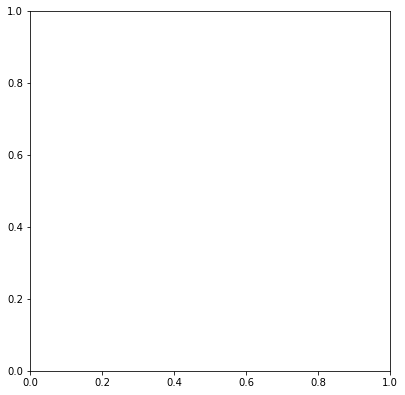

In [ ]:
fig = plt.figure(figsize =(5, 5))
 
# Creating axes instance
# ax = fig.add_axes(["Perennial", "Seasonal"])
ax = fig.add_axes([0, 0, 1, 1])

 
# Creating plot
bp = ax.boxplot([box_plot_x_1,box_plot_x_2])
 
# show plot


plt.ylabel("Fraction of classification")
plt.xlabel("Type of body")

ax.set_xticklabels(['Perennial','Seasonal'])

plt.show()

In [39]:
dfnp = dfp[['geo']].drop_duplicates()


# "Kharif"
dfnp['11'] = 0
dfnp['12'] = 0
dfnp['13'] = 0
dfnp['14'] = 0

# "Rabi"
dfnp['21'] = 0
dfnp['22'] = 0
dfnp['23'] = 0
dfnp['24'] = 0

# "Zaid"
dfnp['31'] = 0
dfnp['32'] = 0
dfnp['33'] = 0
dfnp['34'] = 0


dfnp.head()

,geo,11,12,13,14,21,22,23,24,31,32,33,34


In [40]:
dfns = dfs[['geo']].drop_duplicates()


# "Kharif"
dfns['11'] = 0
dfns['12'] = 0
dfns['13'] = 0
dfns['14'] = 0

# "Rabi"
dfns['21'] = 0
dfns['22'] = 0
dfns['23'] = 0
dfns['24'] = 0

# "Zaid"
dfns['31'] = 0
dfns['32'] = 0
dfns['33'] = 0
dfns['34'] = 0


dfns.head()

,geo,11,12,13,14,21,22,23,24,31,32,33,34
0,"{""geodesic"":false,""type"":""Point"",""coordinates""...",0,0,0,0,0,0,0,0,0,0,0,0
1,"{""geodesic"":false,""type"":""Point"",""coordinates""...",0,0,0,0,0,0,0,0,0,0,0,0
2,"{""geodesic"":false,""type"":""Point"",""coordinates""...",0,0,0,0,0,0,0,0,0,0,0,0
3,"{""geodesic"":false,""type"":""Point"",""coordinates""...",0,0,0,0,0,0,0,0,0,0,0,0
4,"{""geodesic"":false,""type"":""Point"",""coordinates""...",0,0,0,0,0,0,0,0,0,0,0,0


In [41]:
for index, row in dfp.iterrows():
    month = (int)(row['system_index'][4:6])
    classif = row['classification']
    # print(classif)
    
    if month >= 7 and month <= 10:
        t = '1'
    elif month >= 3 and month <= 6:
        t = '3'
    else:
        t = '2'
    
    column_name = t + str(classif)
    
    # print(column_name)
    
    dfnp.loc[dfnp['geo'] == row['geo'], [column_name]] += 1
    # dfn.loc[dfn['geo'] == some_value]
    
dfnp.head()

,geo,11,12,13,14,21,22,23,24,31,32,33,34


In [42]:
import ast

dfnp_rep = dfnp[['geo']].copy()
dfnp_rep['x'] = 0
dfnp_rep['y'] = 0
dfnp_rep['value'] = 0

for index, row in dfnp.iterrows():
    bin = 0
    if row['12'] > 0:
        bin += 1 << 2

    if row['22'] >0 :
        bin += 1 << 1
    
    if row['32'] >0 :
        bin += 1
        
    dfnp_rep.loc[dfnp_rep['geo'] == row['geo'], ['value']] = bin

    dict_e = row['geo'].replace('false','False')
    dict_e = ast.literal_eval(dict_e) 
    dict_e = dict_e['coordinates']
    dfnp_rep.loc[dfnp_rep['geo'] == row['geo'], ['x']] = dict_e[0]
    dfnp_rep.loc[dfnp_rep['geo'] == row['geo'], ['y']] = dict_e[1]

dfnp_rep = dfnp_rep.drop(['geo'],axis = 1)

dfnp_rep.head()


dfnp_rep.to_csv("./Perennial_for_tif.csv",index=False)

In [43]:
# Jan 1
# Feb 2
# Mar 3
# Apr 4
# May 5
# June 6
# jULY 7
# aUG 8
# sept 
# oct 10 
# nov 11
# dec 12

for index, row in dfs.iterrows():
    month = (int)(row['system_index'][4:6])
    classif = row['classification']
    # print(classif)
    
    if month >= 7 and month <= 10:
        t = '1'
    elif month >= 3 and month <= 6:
        t = '3'
    else:
        t = '2'
    
    column_name = t + str(classif)
    
    # print(column_name)
    
    dfns.loc[dfns['geo'] == row['geo'], [column_name]] += 1
    # dfn.loc[dfn['geo'] == some_value]
    
dfns.head()

,geo,11,12,13,14,21,22,23,24,31,32,33,34
0,"{""geodesic"":false,""type"":""Point"",""coordinates""...",0,0,0,0,10,0,0,1,5,0,0,2
1,"{""geodesic"":false,""type"":""Point"",""coordinates""...",0,0,0,0,10,0,0,1,3,0,0,4
2,"{""geodesic"":false,""type"":""Point"",""coordinates""...",0,0,0,0,10,0,0,1,7,0,0,0
3,"{""geodesic"":false,""type"":""Point"",""coordinates""...",0,0,0,0,11,0,0,0,7,0,0,0
4,"{""geodesic"":false,""type"":""Point"",""coordinates""...",0,0,0,0,10,0,0,1,5,0,0,2


In [44]:
dfns_rep = dfns[['geo']].copy()
dfns_rep['x'] = 0
dfns_rep['y'] = 0
dfns_rep['value'] = 0

for index, row in dfns.iterrows():
    bin = 0
    if row['12'] > 0:
        bin += 1 << 2

    if row['22'] >0 :
        bin += 1 << 1
    
    if row['32'] >0 :
        bin += 1
        
    dfns_rep.loc[dfns_rep['geo'] == row['geo'], ['value']] = bin
    
    dfns_rep.loc[dfns_rep['geo'] == row['geo'], ['value']] = bin

    dict_e = row['geo'].replace('false','False')
    dict_e = ast.literal_eval(dict_e) 
    dict_e = dict_e['coordinates']
    dfns_rep.loc[dfns_rep['geo'] == row['geo'], ['x']] = dict_e[0]
    dfns_rep.loc[dfns_rep['geo'] == row['geo'], ['y']] = dict_e[1]


dfns_rep = dfns_rep.drop(['geo'],axis = 1)


dfns_rep.head()
dfns_rep.to_csv("./Seasonal_for_tif.csv",index=False)


In [45]:
dfnps = dfnp.sample(n = 11)



dfnss = dfns.sample(n = 10)

dfnn = pd.concat([dfnps,dfnss]).reset_index()

dfnn.head()


ValueError: a must be greater than 0 unless no samples are taken

In [ ]:
import ast
for index, row in dfnn.iterrows():
    # print(row['geo'])
    dict_e = row['geo'].replace('false','False')
    dict_e = ast.literal_eval(dict_e) 
    dict_e = dict_e['coordinates']

    dict_e = (round(dict_e[0],2),round(dict_e[1],2))
    dfnn.at[index,'geo'] = str(dict_e)
    # print(dict_e)

In [ ]:
dfnn.at[10,'geo'] = ''
dfnn.at[10,'11'] = 0
dfnn.at[10,'12'] = 0
dfnn.at[10,'13'] = 0
dfnn.at[10,'14'] = 0
dfnn.at[10,'21'] = 0
dfnn.at[10,'22'] = 0
dfnn.at[10,'23'] = 0
dfnn.at[10,'24'] = 0
dfnn.at[10,'31'] = 0
dfnn.at[10,'32'] = 0
dfnn.at[10,'33'] = 0
dfnn.at[10,'34'] = 0

/tmp/ipykernel_27651/577881649.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfnn_k.rename(columns={'11':'1','12':'2','13':'3','14':'4'},inplace= True)
/tmp/ipykernel_27651/577881649.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfnn_r.rename(columns={'21':'1','22':'2','23':'3','24':'4'},inplace= True)
/tmp/ipykernel_27651/577881649.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfnn_z.rename(columns={'31':'1','32':'2

<AxesSubplot:title={'center':'Zaid'}, xlabel='geo'>

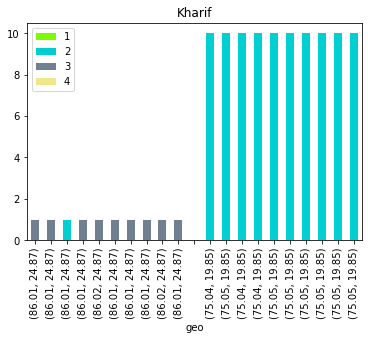

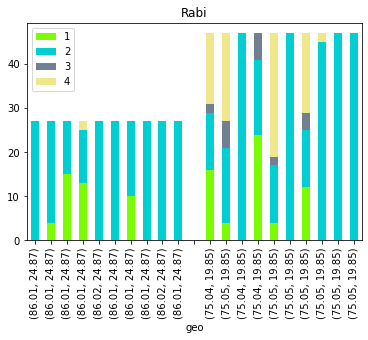

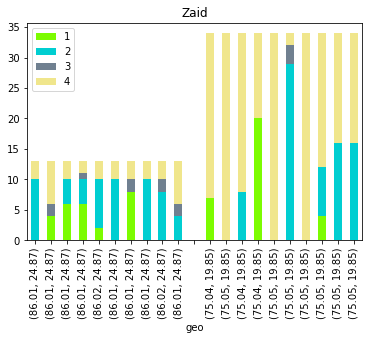

In [ ]:
dfnn_k = dfnn[['geo','11','12','13','14']]
dfnn_k.rename(columns={'11':'1','12':'2','13':'3','14':'4'},inplace= True)

dfnn_k.plot.bar(x='geo', stacked=True, title='Kharif', color=['lawngreen','darkturquoise','slategrey','khaki'])


dfnn_r = dfnn[['geo','21','22','23','24']]
dfnn_r.rename(columns={'21':'1','22':'2','23':'3','24':'4'},inplace= True)

dfnn_r.plot.bar(x='geo', stacked=True, title='Rabi', color=['lawngreen','darkturquoise','slategrey','khaki'])

dfnn_z = dfnn[['geo','31','32','33','34']]
dfnn_z.rename(columns={'31':'1','32':'2','33':'3','34':'4'},inplace= True)

dfnn_z.plot.bar(x='geo', stacked=True, title='Zaid', color=['lawngreen','darkturquoise','slategrey','khaki'])

In [ ]:
dfms = dfs[['geo']].drop_duplicates()

dfms['1_water'] = 0
dfms['1_total'] = 0
dfms['2_water'] = 0
dfms['2_total'] = 0
dfms['3_water'] = 0
dfms['3_total'] = 0
dfms['4_water'] = 0
dfms['4_total'] = 0
dfms['5_water'] = 0
dfms['5_total'] = 0
dfms['6_water'] = 0
dfms['6_total'] = 0
dfms['7_water'] = 0
dfms['7_total'] = 0
dfms['8_water'] = 0
dfms['8_total'] = 0
dfms['9_water'] = 0
dfms['9_total'] = 0
dfms['10_water'] = 0
dfms['10_total'] = 0
dfms['11_water'] = 0
dfms['11_total'] = 0
dfms['12_water'] = 0
dfms['12_total'] = 0

In [ ]:

for index, row in dfs.iterrows():
    month = (str)((int)(row['system_index'][4:6]))
    classif = (int)(row['classification'])
    
    dfms.loc[dfms['geo'] == row['geo'], [month + '_total']] += 1
    
    if classif == 2:
        dfms.loc[dfms['geo'] == row['geo'], [month + '_water']] += 1
        
        
    

In [ ]:
dfms.head()

,geo,1_water,1_total,2_water,2_total,3_water,3_total,4_water,4_total,5_water,...,8_water,8_total,9_water,9_total,10_water,10_total,11_water,11_total,12_water,12_total
2747,"{""geodesic"":false,""type"":""Point"",""coordinates""...",0,12,0,22,0,22,0,7,0,...,0,0,0,0,10,10,0,0,6,13
2748,"{""geodesic"":false,""type"":""Point"",""coordinates""...",0,12,0,22,0,22,0,7,0,...,0,0,0,0,10,10,0,0,9,13
2749,"{""geodesic"":false,""type"":""Point"",""coordinates""...",0,12,0,22,0,22,0,7,0,...,0,0,0,0,10,10,0,0,13,13
2750,"{""geodesic"":false,""type"":""Point"",""coordinates""...",8,12,4,22,0,22,0,7,0,...,0,0,0,0,10,10,0,0,13,13
2751,"{""geodesic"":false,""type"":""Point"",""coordinates""...",0,12,0,22,0,22,0,7,0,...,0,0,0,0,10,10,0,0,13,13


In [ ]:
dfmp = dfp[['geo']].drop_duplicates()

dfmp['1_water'] = 0
dfmp['1_total'] = 0
dfmp['2_water'] = 0
dfmp['2_total'] = 0
dfmp['3_water'] = 0
dfmp['3_total'] = 0
dfmp['4_water'] = 0
dfmp['4_total'] = 0
dfmp['5_water'] = 0
dfmp['5_total'] = 0
dfmp['6_water'] = 0
dfmp['6_total'] = 0
dfmp['7_water'] = 0
dfmp['7_total'] = 0
dfmp['8_water'] = 0
dfmp['8_total'] = 0
dfmp['9_water'] = 0
dfmp['9_total'] = 0
dfmp['10_water'] = 0
dfmp['10_total'] = 0
dfmp['11_water'] = 0
dfmp['11_total'] = 0
dfmp['12_water'] = 0
dfmp['12_total'] = 0

In [ ]:

for index, row in dfp.iterrows():
    month = (str)((int)(row['system_index'][4:6]))
    classif = (int)(row['classification'])
    
    dfmp.loc[dfmp['geo'] == row['geo'], [month + '_total']] += 1
    
    if classif == 2:
        dfmp.loc[dfmp['geo'] == row['geo'], [month + '_water']] += 1

In [ ]:
dfmp.head()

,geo,1_water,1_total,2_water,2_total,3_water,3_total,4_water,4_total,5_water,...,8_water,8_total,9_water,9_total,10_water,10_total,11_water,11_total,12_water,12_total
0,"{""geodesic"":false,""type"":""Point"",""coordinates""...",2,2,10,10,6,6,4,5,2,...,0,0,0,0,1,1,9,9,6,6
1,"{""geodesic"":false,""type"":""Point"",""coordinates""...",0,2,2,10,2,6,0,5,0,...,0,0,0,0,1,1,6,9,4,6
2,"{""geodesic"":false,""type"":""Point"",""coordinates""...",0,2,2,10,2,6,0,5,2,...,0,0,0,0,1,1,6,9,4,6
3,"{""geodesic"":false,""type"":""Point"",""coordinates""...",2,2,10,10,6,6,2,5,2,...,0,0,0,0,1,1,9,9,6,6
4,"{""geodesic"":false,""type"":""Point"",""coordinates""...",2,2,10,10,6,6,2,5,2,...,0,0,0,0,1,1,9,9,6,6


Text(0.5, 1.0, 'Graph for (86.0158, 24.8701)')

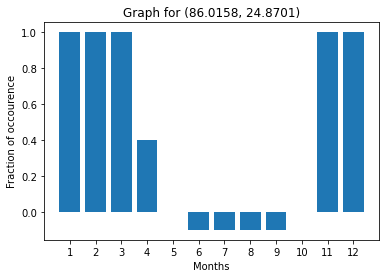

In [ ]:
dfp_element = dfmp.sample(n=1)

for index, row in dfp_element.iterrows():
    bar_x = []
    bar_y = []
    for i in range(1,13):
        bar_x.append(i)
        if row[f'{i}_total'] != 0:
            bar_y.append(row[f'{i}_water']/row[f'{i}_total'])
        else: 
            bar_y.append(-0.1)
    
    dict_e = row['geo'].replace('false','False')
    dict_e = ast.literal_eval(dict_e) 
    dict_e = dict_e['coordinates']

    dict_e = (round(dict_e[0],4),round(dict_e[1],4))

plt.bar(bar_x, bar_y)
plt.xticks(bar_x)
plt.xlabel("Months")
plt.ylabel("Fraction of occourence")
plt.title(f"Graph for {dict_e}")

Text(0.5, 1.0, 'Graph for (75.0467, 19.8513)')

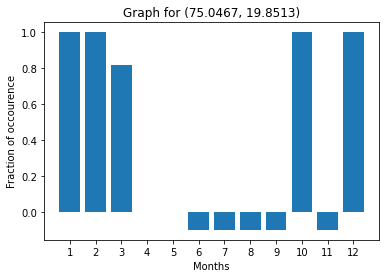

In [ ]:
dfs_element = dfms.sample(n=1)

for index, row in dfs_element.iterrows():
    bar_x = []
    bar_y = []
    for i in range(1,13):
        bar_x.append(i)
        if row[f'{i}_total'] != 0:
            bar_y.append(row[f'{i}_water']/row[f'{i}_total'])
        else: 
            bar_y.append(-0.1)
    
    dict_e = row['geo'].replace('false','False')
    dict_e = ast.literal_eval(dict_e) 
    dict_e = dict_e['coordinates']

    dict_e = (round(dict_e[0],4),round(dict_e[1],4))


plt.bar(bar_x, bar_y)
plt.xlabel("Months")
plt.ylabel("Fraction of occourence")
plt.xticks(bar_x)

plt.title(f"Graph for {dict_e}")